Модульная домашняя работа №1
=======

Вариант 8

In [61]:
import numpy as np
import pandas as pd
import math
import random
import statistics
import scipy.stats

In [6]:
#  Задаем рабочую папку
import os
os.chdir("/Users/adminadministrator/Documents/Институт биоинформатики/статистика/часть 2")


In [18]:
import matplotlib
import matplotlib.pyplot as plt

# выбор темы картинок на мой вкус. Необязательная строчка.
matplotlib.style.use('ggplot')
# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

### Задание 1

(array([0.05709536, 0.05709536, 0.09991688, 0.0713692 , 0.15701223,
        0.28547679, 0.28547679, 0.58522742, 0.79933501, 0.74223965,
        1.156181  , 1.17045484, 0.95634724, 1.27037171, 1.28464555,
        0.99916876, 1.11335948, 0.77078733, 0.6137751 , 0.49958438,
        0.35684599, 0.31402447, 0.22838143, 0.17128607, 0.11419072,
        0.02854768, 0.01427384, 0.02854768, 0.01427384, 0.02854768]),
 array([-0.94637176, -0.87631352, -0.80625529, -0.73619705, -0.66613882,
        -0.59608058, -0.52602235, -0.45596411, -0.38590588, -0.31584764,
        -0.24578941, -0.17573117, -0.10567294, -0.0356147 ,  0.03444353,
         0.10450177,  0.17456   ,  0.24461824,  0.31467647,  0.38473471,
         0.45479294,  0.52485118,  0.59490941,  0.66496765,  0.73502588,
         0.80508412,  0.87514235,  0.94520059,  1.01525882,  1.08531706,
         1.15537529]),
 <BarContainer object of 30 artists>)

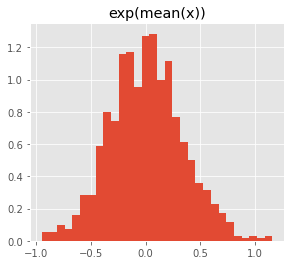

In [47]:
p = 0.1
theta_array = []
for _ in range(1000):#n in  range(1000,100000, 10000):
    n = 10000
    theta_array.append((np.exp(np.mean(np.random.binomial(1, p, n))) - np.exp(p))*math.sqrt(n))
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("exp(mean(x))")
# plt.xlabel("xlabel")
# plt.ylabel("ylabel")
plt.hist(x = theta_array, bins=30,  density = True)

Промоделировано что оценка является асимптотически нормальной. Предположу, что наша оценка оценивает - логарифм p.

In [51]:
array = []
for n in range(1, 1000, 1):
    s = []
    for _ in range(100):
        s.append(np.mean(np.random.binomial(1, p, n)) - p)
    array.append(np.mean(s))

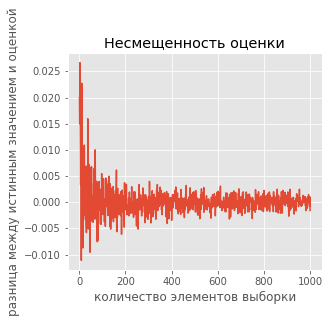

In [70]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Несмещенность оценки")
plt.xlabel("количество элементов выборки")
plt.ylabel("разница между истинным значением и оценкой")
plt.plot(list(range(1,1000,1)),array)

В результате приведенного выше наблюдения моно сделать вывод о том, что это является асимптотически несмещенной оценкой. 

### Задание 2

аналогично дз 3


$\hat{med(X)} - z_{1-\varepsilon/2} 2 p(x_{1/2}) \frac{1}{\sqrt{n}} <med(X) < \hat{med(X)} + z_{1-\varepsilon/2} 2 p(x_{1/2}) \frac{1}{\sqrt{n}} $

рассмотрим нормальное распредление с известным стандартным отклонением $\sigma$, тогда, согласно дз 3 получаем (медиана совпадает со средним обазначеным здесь a):
$\hat{med(X)} - z_{1-\varepsilon/2}\sigma \sqrt{\frac{\pi}{2n}} < a < \hat{med(X)} + z_{1-\varepsilon/2}\sigma \sqrt{\frac{\pi}{2n}}$

In [92]:
eps = 0.1
z = scipy.stats.norm.ppf(1-eps/2)
a, sigma = 10, 1
n = 1000
zz = z * sigma * math.sqrt(math.pi/(2*n))
summ = 0
nn = 1000
for i in range(nn):
    s = np.random.normal(a, sigma, n)
    theta = statistics.median(s)
    if theta - zz < a and theta + zz > a:
        summ += 1
print ('eps = ', eps, '  сколько значений не попало =', 1 - summ/nn)

eps =  0.1   сколько значений не попало = 0.10699999999999998


In [93]:
eps = 0.05
z = scipy.stats.norm.ppf(1-eps/2)
a, sigma = 10, 1
n = 1000
zz = z * sigma * math.sqrt(math.pi/(2*n))
summ = 0
nn = 1000
for i in range(nn):
    s = np.random.normal(a, sigma, n)
    theta = statistics.median(s)
    if theta - zz < a and theta + zz > a:
        summ += 1
print ('eps = ', eps, '  сколько значений не попало =', 1 - summ/nn)

eps =  0.05   сколько значений не попало = 0.04400000000000004


In [97]:
eps = 0.01
z = scipy.stats.norm.ppf(1-eps/2)
a, sigma = 10, 1
n = 10000
zz = z * sigma * math.sqrt(math.pi/(2*n))
summ = 0
nn = 10000
for i in range(nn):
    s = np.random.normal(a, sigma, n)
    theta = statistics.median(s)
    if theta - zz < a and theta + zz > a:
        summ += 1
print ('eps = ', eps, '  сколько значений не попало =', 1 - summ/nn)

eps =  0.01   сколько значений не попало = 0.00880000000000003


Как видно из приведенных выше вычисленний доверительные интервалы - действительно доверительные

### Задание 3

для выполнения данного задания рассмотрим нормальное распредление. С средним 10 и стандартным отклонением 1

In [119]:
a, sigma = 10, 1

suprem = []

step = 100
max_sample = 10000

for n in range(step, max_sample, step):
    s = np.sort(np.random.normal(a, sigma, n))
    sup_temp = 0
    for i in range(n):
        sup_temp = max(sup_temp, abs(scipy.stats.norm.cdf(s[i], loc = a, scale = sigma) - i/n))
    suprem.append(sup_temp)


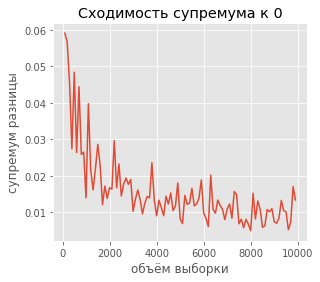

In [120]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Сходимость супремума к 0")
plt.xlabel("объём выборки")
plt.ylabel("супремум разницы")
plt.plot(list(range(step,max_sample,step)),suprem)

Таким образом продемонстрировано выполнение теоремы Гливенко-Кантелли